In [2]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import random as rd
data = pd.read_csv("drive/My Drive/clean_tweet.csv",index_col=0)
data.head()

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,tweet_text,target
0,awww that bummer you shoulda got david carr of...,0
1,is upset that he can not update his facebook b...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it not behaving at all mad why am here beca...,0


In [4]:
data[data.isnull().any(axis=1)].head(20)


,tweet_text,target
208,NaN,0
249,NaN,0
282,NaN,0
398,NaN,0
430,NaN,0
1011,NaN,0
1014,NaN,0
1231,NaN,0
1421,NaN,0
1486,NaN,0


In [5]:
data.dropna(inplace=True) #NAN values are coming from just @username, delete them 
data.reset_index(drop=True,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596041 entries, 0 to 1596040
Data columns (total 2 columns):
tweet_text    1596041 non-null object
target        1596041 non-null int64
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [6]:
data[data.isnull().any(axis=1)].head() #No more null data


,tweet_text,target


In [83]:
data

,tweet_text,target
0,awww that bummer you shoulda got david carr of...,0
1,is upset that he can not update his facebook b...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it not behaving at all mad why am here beca...,0
...,...,...
1596036,just woke up having no school is the best feel...,4
1596037,thewdb com very cool to hear old walt interviews,4
1596038,are you ready for your mojo makeover ask me fo...,4
1596039,happy th birthday to my boo of alll time tupac...,4


In [150]:
sample_data = data.sample(frac=1, random_state=2000)
sample_data


,tweet_text,target
1178330,finally it updates,4
835935,th place,4
799921,anybody in atlanta hiring if you are looking f...,4
1127201,omgoosh six flags ad sorry wanna go on thee bo...,4
709521,arggh that so so so bad wish you to come,0
...,...,...
689718,my parents are on party im alone and must clea...,0
856013,have great day ride your scooter around town a...,4
324814,need to write but when sit down the words just...,0
430920,want to go for walk but nobody is awake to com...,0


In [0]:
# x_data = sample_data['tweet_text'].sample(frac=.795, random_state=2000)
# y_data = sample_data['target'].sample(frac=.795, random_state=2000)
# x_data

In [0]:
# remaining_set = sample_data.loc[~sample_data['tweet_text'].index.isin(x_data.index), :]
# remaining_set


In [0]:
# x_train = data['tweet_text'].sample(frac=.90, random_state=2000)
# y_train = data['target'].sample(frac=.90, random_state=2000)
# remaining_set = data.loc[~data['tweet_text'].index.isin(x_train.index), :]
# remaining_set #no overlap

# x_validation = remaining_set['tweet_text'].sample(frac=1, random_state=2000)
# x_validation
# y_validation = remaining_set['target'].sample(frac=1, random_state=2000)
# y_validation


X = []
tweets = list(sample_data['tweet_text'])
for lines in tweets:
    X.append(lines)

In [153]:
len(X)

1596041

In [0]:
y = sample_data['target']

#1 == positive, 0 == negative
y = np.array(list(map(lambda x: 0 if x==0 else 1, y))) 

In [0]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split, StratifiedKFold

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train = X 
y_train = y


In [156]:
len(y_train)

1596041

In [157]:
len(X_train)

1596041

In [158]:
columns = ['polarity','tweet_id','date','query_string','username','tweet_text']


test = pd.read_csv("drive/My Drive/testdata.csv", sep=",", header = None, names=columns)
test

,polarity,tweet_id,date,query_string,username,tweet_text
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...
...,...,...,...,...,...,...
493,2,14072,Sun Jun 14 04:31:43 UTC 2009,latex,proggit,Ask Programming: LaTeX or InDesign?: submitted...
494,0,14073,Sun Jun 14 04:32:17 UTC 2009,latex,sam33r,"On that note, I hate Word. I hate Pages. I hat..."
495,4,14074,Sun Jun 14 04:36:34 UTC 2009,latex,iamtheonlyjosie,Ahhh... back in a *real* text editing environm...
496,0,14075,Sun Jun 14 21:36:07 UTC 2009,iran,plutopup7,"Trouble in Iran, I see. Hmm. Iran. Iran so far..."


In [159]:
test.polarity.value_counts() #80,000 positive and negative examples 


4    182
0    177
2    139
Name: polarity, dtype: int64

In [0]:
test = test[test.polarity != 2] #Drop neutral rows for binary classification (postive or negative)


In [161]:
test.polarity.value_counts() #80,000 positive and negative examples 


4    182
0    177
Name: polarity, dtype: int64

In [162]:
x_test = test['tweet_text']
x_test

0      @stellargirl I loooooooovvvvvveee my Kindle2. ...
1      Reading my kindle2...  Love it... Lee childs i...
2      Ok, first assesment of the #kindle2 ...it fuck...
3      @kenburbary You'll love your Kindle2. I've had...
4      @mikefish  Fair enough. But i have the Kindle2...
                             ...                        
492    After using LaTeX a lot, any other typeset mat...
494    On that note, I hate Word. I hate Pages. I hat...
495    Ahhh... back in a *real* text editing environm...
496    Trouble in Iran, I see. Hmm. Iran. Iran so far...
497    Reading the tweets coming out of Iran... The w...
Name: tweet_text, Length: 359, dtype: object

In [163]:
y_test = test['polarity']
y_test

0      4
1      4
2      4
3      4
4      4
      ..
492    4
494    0
495    4
496    0
497    0
Name: polarity, Length: 359, dtype: int64

In [0]:
X_test = []
tweets = list(test['tweet_text'])
for lines in tweets:
    X_test.append(lines)

y_test = test['polarity']

#1 == positive, 0 == negative
y_test = np.array(list(map(lambda x: 0 if x==0 else 1, y_test))) 

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(x_test)

In [0]:
vocab_size = len(tokenizer.word_index) + 1

maxlen = 50

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)


In [167]:
len(X_train)


1596041

In [168]:
len(X_test)

359

In [0]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('drive/My Drive/glove.6B.200d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [0]:
embedding_matrix = zeros((vocab_size, 200))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from keras.layers import Flatten

def get_model():

  model = Sequential()

  embedding_layer = Embedding(vocab_size, 200, weights=[embedding_matrix], input_length=maxlen , trainable=False)
  model.add(embedding_layer)

  model.add(Conv1D(128, 5, activation='relu'))
  model.add(GlobalMaxPooling1D())
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

  return model 

In [0]:
model = get_model()

In [173]:
# early_stopping = keras.callbacks.EarlyStopping(patience=3, verbose=2, mode='auto', min_delta=0.00005)

history = model.fit(X_train, y_train, batch_size=64, epochs=6, verbose=1, validation_split=0.2)



Train on 1276832 samples, validate on 319209 samples
Epoch 1/6
1276832/1276832 [==============================] - 98s 77us/step - loss: 0.4595 - acc: 0.7830 - val_loss: 0.4382 - val_acc: 0.7955
Epoch 2/6
1276832/1276832 [==============================] - 96s 75us/step - loss: 0.4276 - acc: 0.8030 - val_loss: 0.4356 - val_acc: 0.7976
Epoch 3/6
1276832/1276832 [==============================] - 96s 75us/step - loss: 0.4143 - acc: 0.8111 - val_loss: 0.4367 - val_acc: 0.8005
Epoch 4/6
1276832/1276832 [==============================] - 96s 75us/step - loss: 0.4048 - acc: 0.8159 - val_loss: 0.4301 - val_acc: 0.8040
Epoch 5/6
1276832/1276832 [==============================] - 96s 75us/step - loss: 0.3972 - acc: 0.8202 - val_loss: 0.4310 - val_acc: 0.8035
Epoch 6/6
1276832/1276832 [==============================] - 96s 75us/step - loss: 0.3916 - acc: 0.8235 - val_loss: 0.4307 - val_acc: 0.8036


In [174]:
score = model.evaluate(X_test, y_test, verbose=1)

359/359 [==============================] - 0s 80us/step


In [175]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1]) #Train on 80440 samples, validate on 20111 samples: Test Accuracy: 0.7966573819476582, Test Score: 0.5130204541769532, 6 epochs

#Dropping rows with neutral label improved acc(better than neutral points being labeled as positive (.777))
#(and better than neutral points being labeled as negative(.668))

Test Score: 0.42896397449179946
Test Accuracy: 0.8022284125883267


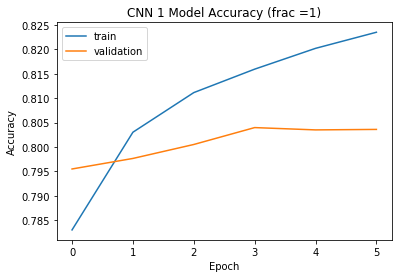

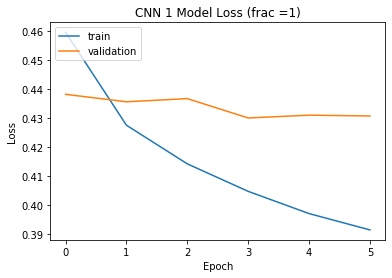

In [176]:
#Graphs

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('CNN 1 Model Accuracy (frac =1)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('CNN 1 Model Loss (frac =1)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','validation'], loc = 'upper left')
plt.show()

In [177]:
#K-Fold Experiments 

folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
cvscores = []
historyscores = []
i = 0

for train, test in folds.split(X_train, y_train):
  print("Fold: ", i)

  model2 = get_model()

  history2 = model2.fit(X_train[train], y_train[train], batch_size=32, epochs=6, verbose=1)
  historyscores.append(history2.history['acc'])
  scores = model2.evaluate(X_train[test], y_train[test], verbose=1)
  print("%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))
  cvscores.append(scores[1] * 100)
  i += 1

Fold:  0
Epoch 1/6
1064027/1064027 [==============================] - 143s 134us/step - loss: 0.4646 - acc: 0.7798
Epoch 2/6
1064027/1064027 [==============================] - 141s 133us/step - loss: 0.4327 - acc: 0.8001
Epoch 3/6
1064027/1064027 [==============================] - 142s 133us/step - loss: 0.4188 - acc: 0.8084
Epoch 4/6
1064027/1064027 [==============================] - 141s 132us/step - loss: 0.4081 - acc: 0.8142
Epoch 5/6
1064027/1064027 [==============================] - 141s 132us/step - loss: 0.4002 - acc: 0.8190
Epoch 6/6
532014/532014 [==============================] - 25s 46us/step
acc: 80.03%
Fold:  1
Epoch 1/6
1064027/1064027 [==============================] - 147s 138us/step - loss: 0.4641 - acc: 0.7804
Epoch 2/6
1064027/1064027 [==============================] - 146s 137us/step - loss: 0.4333 - acc: 0.7999
Epoch 3/6
1064027/1064027 [==============================] - 145s 137us/step - loss: 0.4190 - acc: 0.8083
Epoch 4/6
1064027/1064027 [======================

In [178]:
score2 = model2.evaluate(X_test, y_test, verbose=1)

359/359 [==============================] - 0s 77us/step


In [179]:
print(score2[0])
print(score2[1])

0.4699744675152813
0.805013927908661


In [0]:
# history2.history

In [181]:
allscores = []
for i in historyscores:
    for j in i:
        allscores.append(j)
allscores

[0.7798260758414443,
 0.8000887195533373,
 0.80842591400423,
 0.8141823468772642,
 0.8189623007694118,
 0.8230214082914991,
 0.7803523782764513,
 0.7998932357917248,
 0.8082511064098377,
 0.8141005820338785,
 0.8183467148863306,
 0.8225825096539682,
 0.7800884939122625,
 0.800546602156862,
 0.8084975207419354,
 0.8145988639396707,
 0.818970929336222,
 0.8225638798985696]

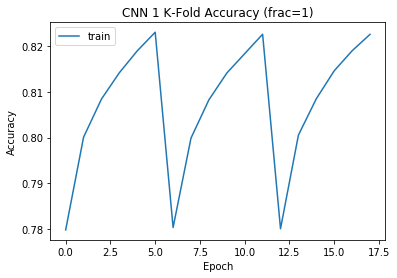

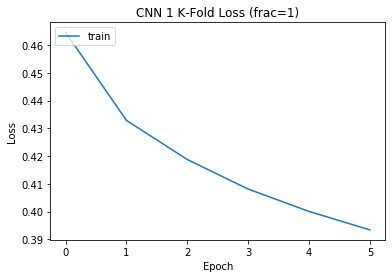

In [182]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(allscores)
# plt.plot(history.history['val_acc'])

plt.title('CNN 1 K-Fold Accuracy (frac=1)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train'], loc = 'upper left')
plt.show()

plt.plot(history2.history['loss'])
# plt.plot(history.history['val_loss'])

plt.title('CNN 1 K-Fold Loss (frac=1)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train'], loc = 'upper left')
plt.show()

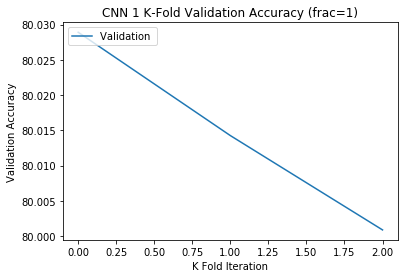

In [183]:
plt.plot(cvscores)

plt.title('CNN 1 K-Fold Validation Accuracy (frac=1)')
plt.ylabel('Validation Accuracy')
plt.xlabel('K Fold Iteration')
plt.legend(['Validation '], loc = 'upper left')
plt.show()